In [66]:
# Import the numpy and pandas package and data visualization packages

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
data=pd.read_csv('Advertising.csv')

In [69]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [70]:
data.shape

(200, 4)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [72]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [73]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x24f42001400>,
 'caps': [<matplotlib.lines.Line2D at 0x24f420019a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f42001130>],
 'medians': [<matplotlib.lines.Line2D at 0x24f42001f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f4200e250>],
 'means': []}

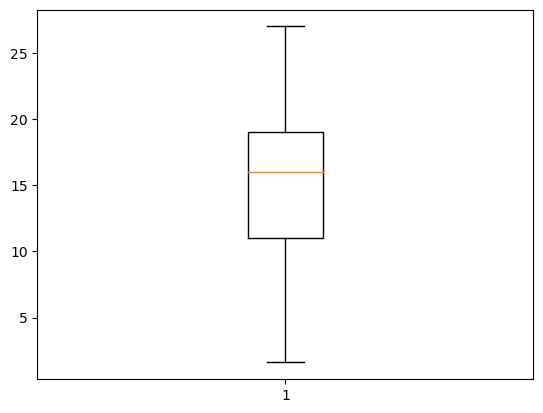

In [74]:
plt.boxplot(data['Sales'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24f42057ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x24f42067460>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f42057c40>],
 'medians': [<matplotlib.lines.Line2D at 0x24f42067a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f42067cd0>],
 'means': []}

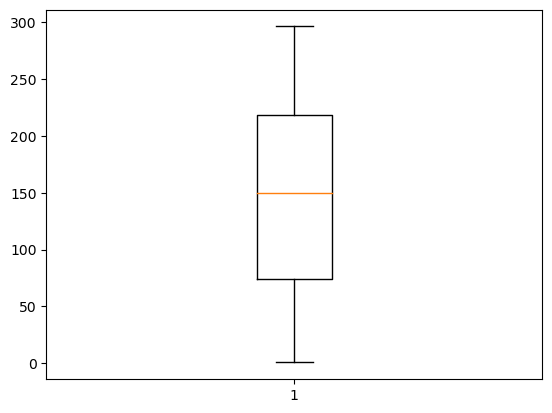

In [75]:
plt.boxplot(data['TV'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24f4208a2b0>,
 'caps': [<matplotlib.lines.Line2D at 0x24f4208a7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f421fcfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x24f4208ad90>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f420980a0>],
 'means': []}

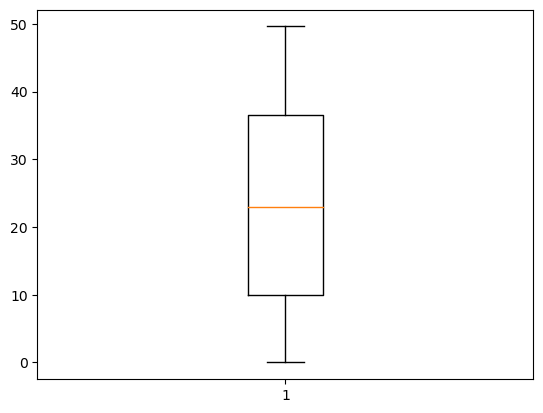

In [76]:
plt.boxplot(data['Radio'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24f420ee280>,
 'caps': [<matplotlib.lines.Line2D at 0x24f420ee820>,
 'boxes': [<matplotlib.lines.Line2D at 0x24f420dff40>],
 'medians': [<matplotlib.lines.Line2D at 0x24f420eedc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f420fd0d0>],
 'means': []}

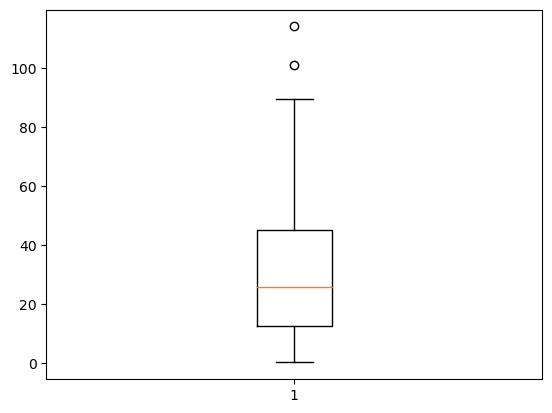

In [77]:
plt.boxplot(data['Newspaper'])

In [78]:
# Let's see how Sales are related with other variables using scatter plot.

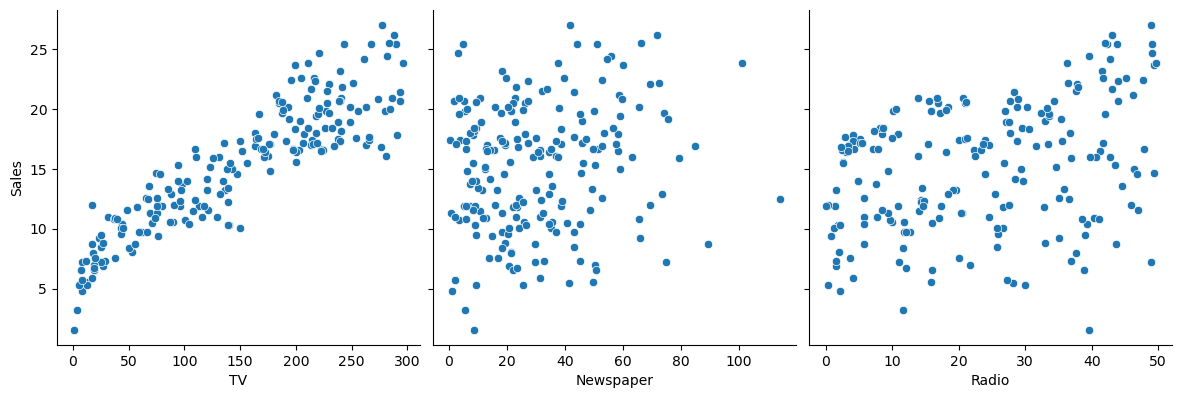

In [79]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

# Model Building

Equation of linear regression
y=c+m1x1+m2x2+...+mnxn
 
y
  is the response
c
  is the intercept
m1
  is the coefficient for the first feature
mn
  is the coefficient for the nth feature
In our case:

y=c+m1×TV
 
The  m
  values are called the model coefficients or model parameters.



.Generic Steps in model building using statsmodels
We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [80]:
x=data['TV']
y=data['Sales']

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
x_train,x_test, Y_train,Y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [83]:
x_train.head

<bound method NDFrame.head of 74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64>

In [84]:
Y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [85]:
#Building a Linear Model
#You first need to import the statsmodel.api library using which you'll perform the linear regression.

In [86]:
import statsmodels.api as sm

In [87]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

In [88]:
# Fit the resgression line using 'OLS'
lr = sm.OLS(Y_train, x_train_sm).fit()

In [89]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [90]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 06 Aug 2023   Prob (F-statistic):           1.52e-52
Time:                        13:59:30   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

Looking at some key statistics from the summary
The values we are concerned with are -

1.The coefficients and significance (p-values)
2.R-squared
3.F statistic and its significance

#1. The coefficient for TV is 0.054, with a very low p value
The coefficient is statistically significant. So the association is not purely by chance.

2. R - squared is 0.816
Meaning that 81.6% of the variance in Sales is explained by TV

This is a decent R-squared value.

3. F statistic has a very low p value (practically low)
#Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.



In [91]:
#The fit is significant. Let's visualize how well the model fit the data.

#From the parameters that we get, our linear regression equation becomes:

#Sales=6.948+0.054×TV

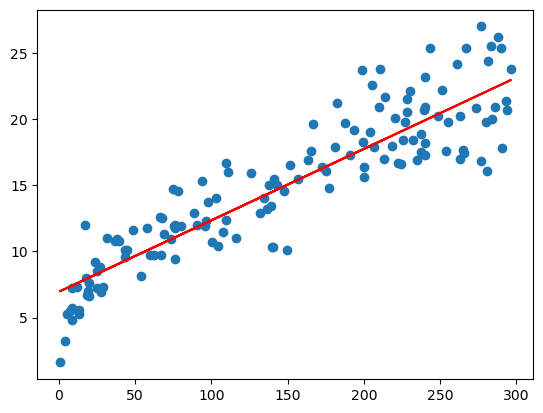

In [92]:
plt.scatter(x_train, Y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

Model Evaluation

In [93]:
#Residual analysis
#To validate assumptions of the model, and hence the reliability for inference

In [94]:
Y_train_pred = lr.predict(x_train_sm)
res = (Y_train - Y_train_pred)

C:\Users\AYUSH NATH TIWARI\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


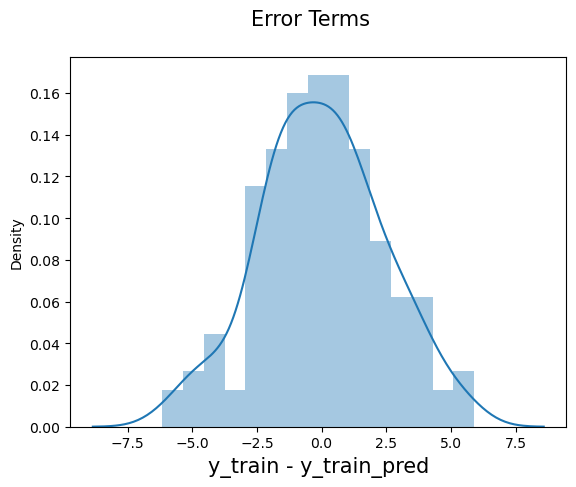

In [95]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

In [96]:
#Looking for patterns in the residuals

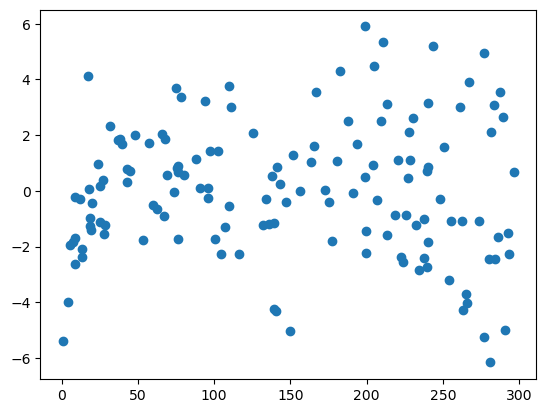

In [97]:
plt.scatter(x_train,res)
plt.show()

In [98]:
#Predictions on the Test Set

Now that you have fitted a regression line on your train dataset,
it's time to make some predictions on the test data. For this, 
you first need to add a constant to the x_test data like you did for X_train and then you can simply go on and predict the Y values corresponding to X_test using the predict attribute of the fitted regression line.

In [99]:
# Add a constant to X_test
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to X_test_sm
Y_pred = lr.predict(x_test_sm)

In [100]:
Y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [102]:
#Looking at the RMSE

In [103]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(Y_test, Y_pred))

2.0192960089662337

Checking the R-squared on the test set

In [104]:
r_squared = r2_score(Y_test, Y_pred)
r_squared

0.7921031601245656

Visualizing the fit on the test set¶

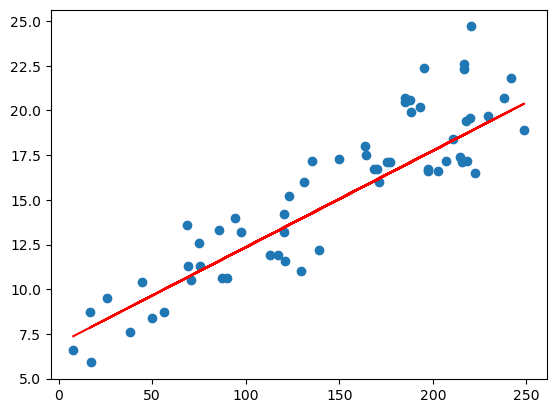

In [105]:
plt.scatter(x_test, Y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()